<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## ハンズオン ラボ: 視覚化を使用して EDA を完了する

Estimated time needed: **70** minutes


この割り当てでは、Falcon 9の第一段階がうまく着陸するかどうかを予測します。 SpaceXは、Falcon 9 Rocketがウェブサイトで6200万ドルのコストで発売されました。他のプロバイダーはそれぞれ1億6500万ドル以上の費用がかかります。貯蓄の多くは、SpaceXが最初の段階を再利用できるという事実によるものです。 

このラボでは、探索的データ分析と機能エンジニアリングを実行します。


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans. 


## 目的
「Pandas」と「Matplotlib」を使用して探索的なデータ分析と特徴エンジニアリングを実行する

-探索的データ分析
-データ特徴エンジニアリングの準備


----


Install the below libraries


In [77]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

222606.37s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
222612.79s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
222618.58s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
222624.39s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab 



In [78]:
# andas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis 


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [79]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


まず、`FlightNumber` (連続的な打ち上げ試行を示します) と `Payload` 変数が打ち上げ結果にどのような影響を与えるかを見てみましょう。

<code>FlightNumber</code> と <code>PayloadMass</code> をプロットして、打ち上げの結果を重ね合わせることができます。飛行便数が増加するにつれて、第 1 段階が正常に着陸する可能性が高くなることがわかります。積載質量も重要です。ペイロードが大きければ大きいほど、最初のステージが戻る可能性は低くなるようです。


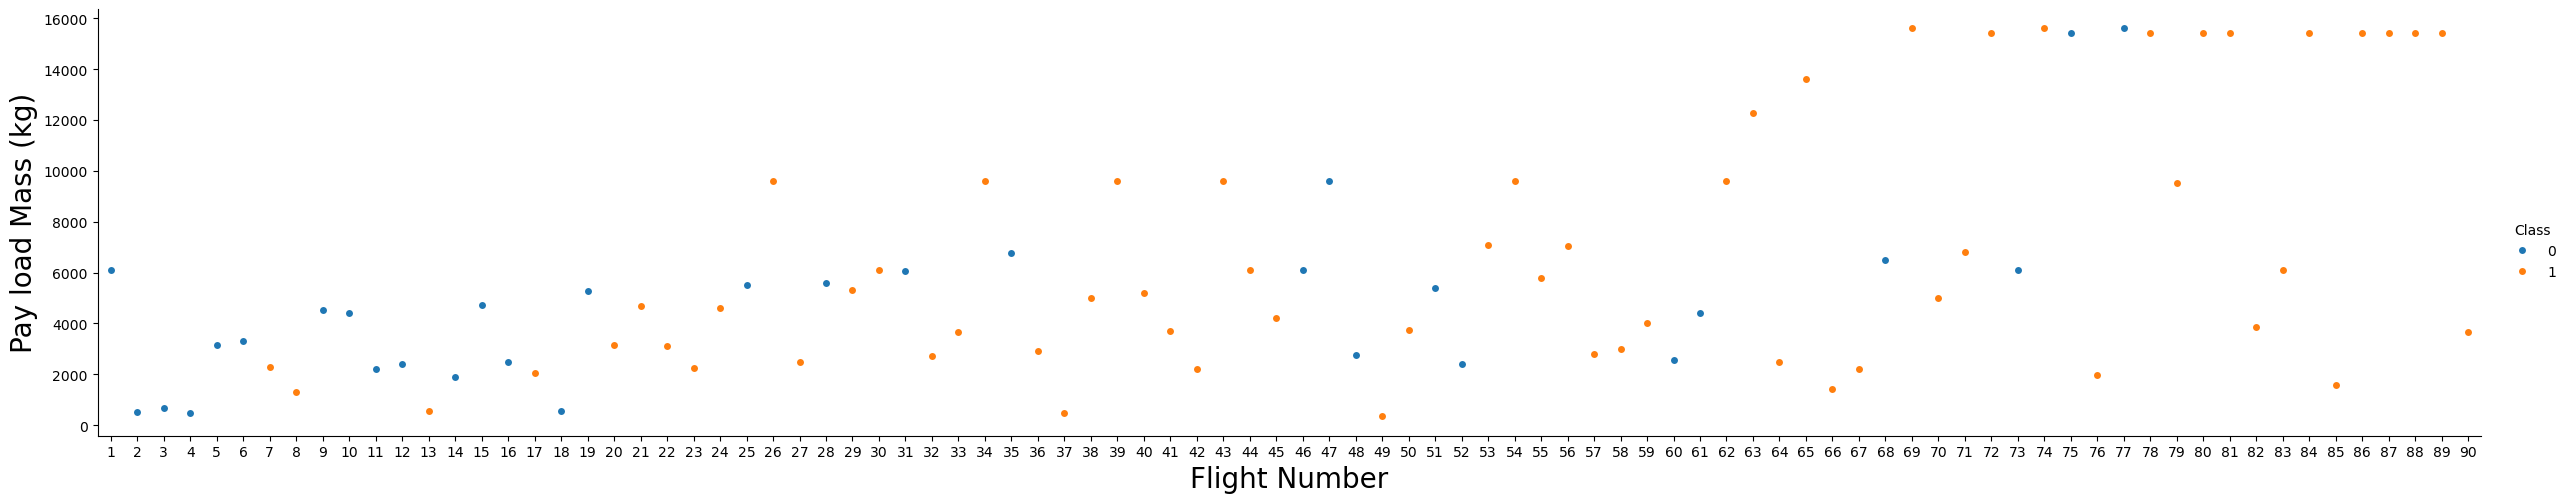

In [80]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


関数 <code>catplot</code> を使用して <code>FlightNumber</code> と <code>LaunchSite</code> をプロットし、パラメータ <code>x</code> パラメータを <code>FlightNumber</に設定します。 code> で、<code>y</code> を <code>Launch Site</code> に設定し、パラメータ <code>hue</code> を <code>'class'</code> に設定します。


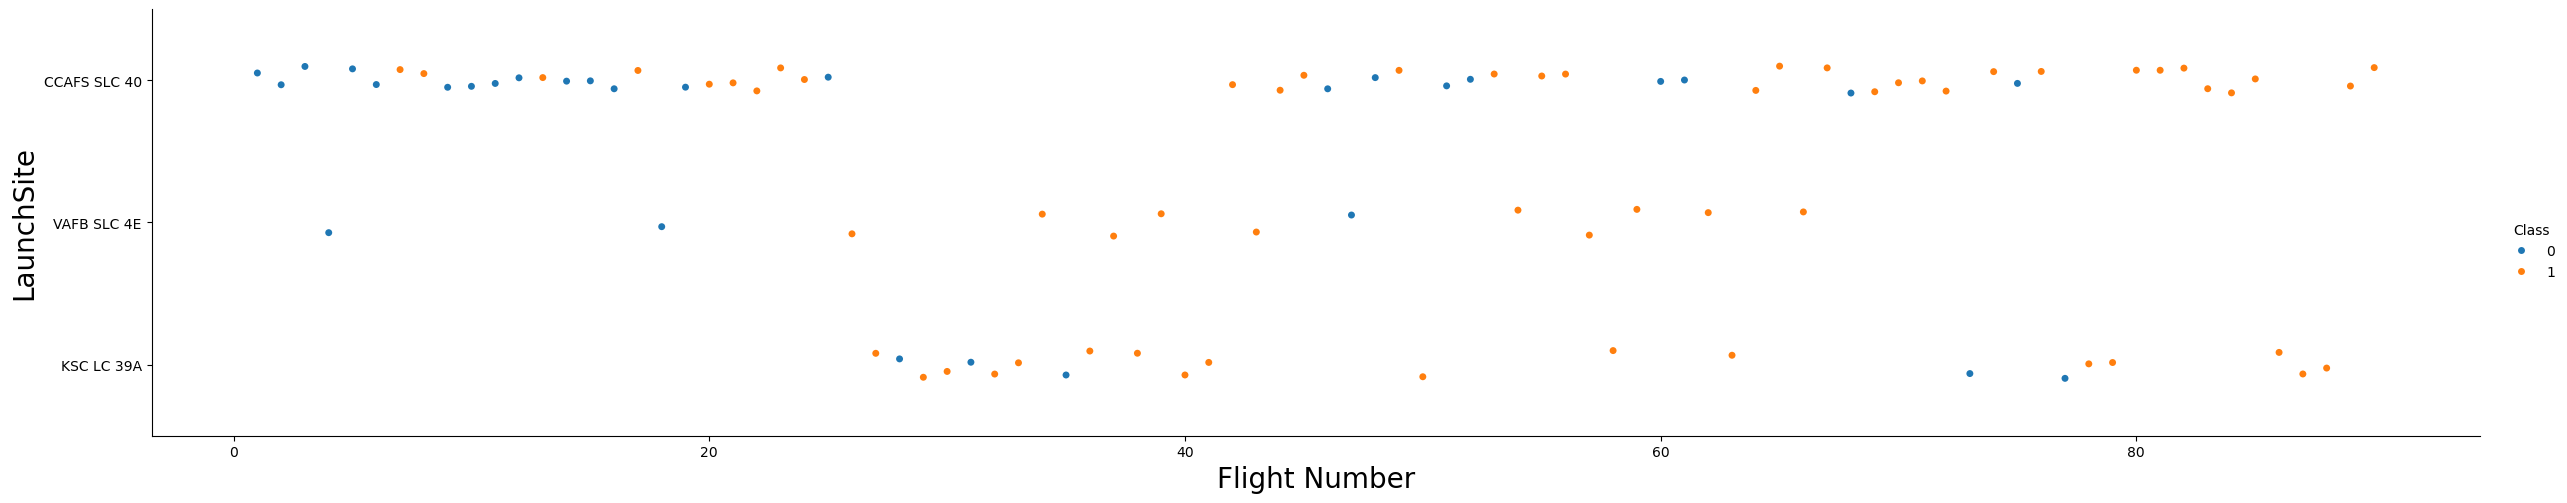

In [81]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value

sns.catplot(y='LaunchSite', x='FlightNumber', hue='Class',data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()



ここで、便名と発射場所の散布点プロットで見つかったパターンを説明してみます。


### タスク2：ペイロードサイトと起動サイトの関係を視覚化する


また、打ち上げサイトとそのペイロード質量の間に関係があるかどうかを観察したいと思います。


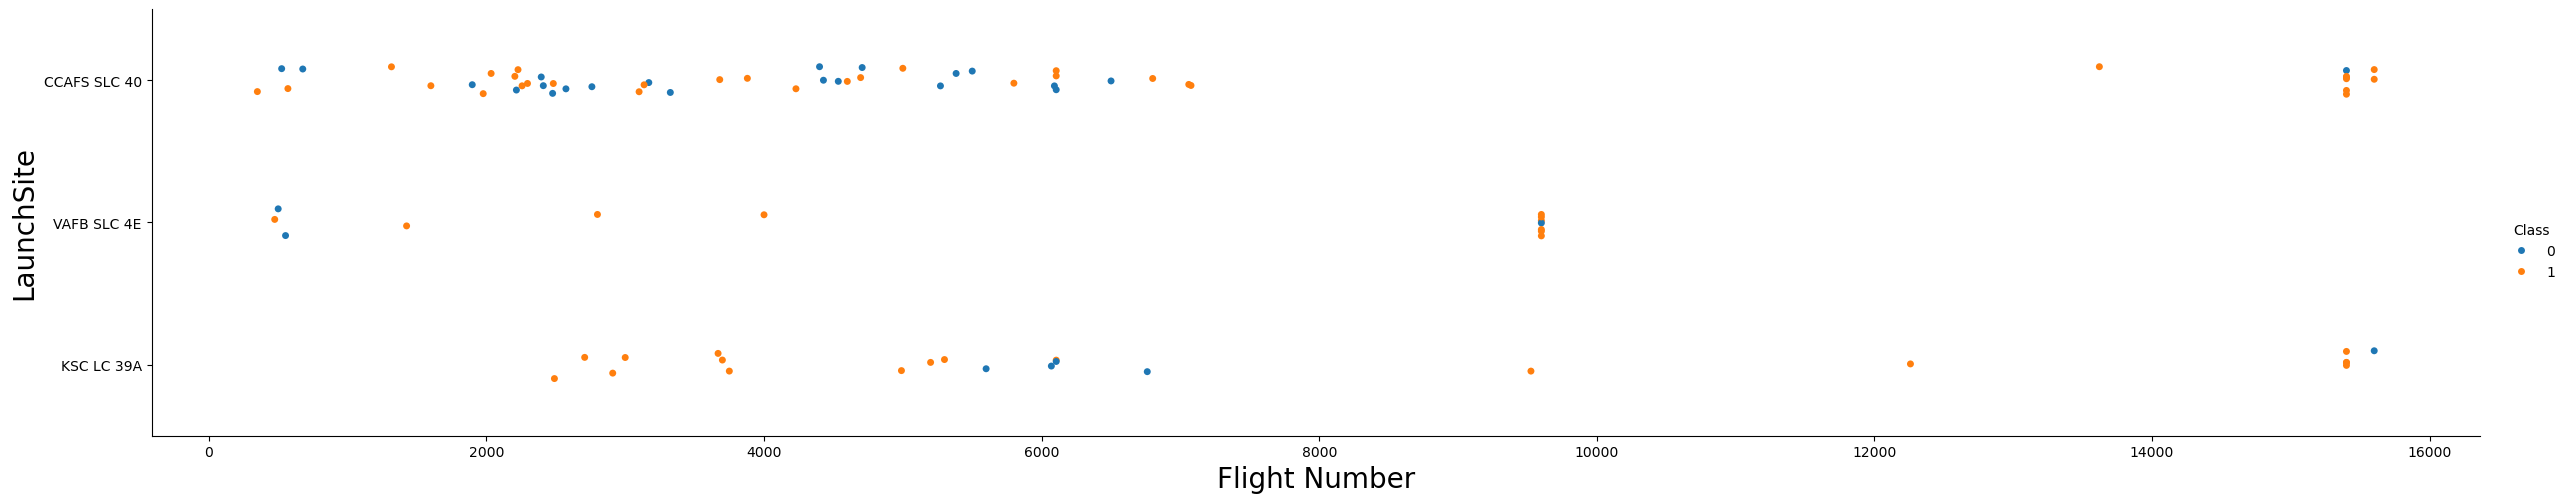

In [82]:
# x軸を備えた散布ポイントチャートをプロットして、積載量（kg）とy軸が起動サイトになり、class値になるようにy軸があります

sns.catplot(y='LaunchSite', x='PayloadMass', hue='Class',data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()



In [83]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

今、あなたがペイロードvsを観察した場合VAFB-SLC LaunchSiteに見られる発射サイト散布点チャートは、HeavyPayload質量（10000を超える）用にロケットが起動されていません。


### タスク3：各軌道タイプの成功率間の関係を視覚化する


次に、成功率と軌道タイプの間に何らかの関係があるかどうかを視覚的に確認します。


各軌道の成功率のために「バーチャート」を作成しましょう


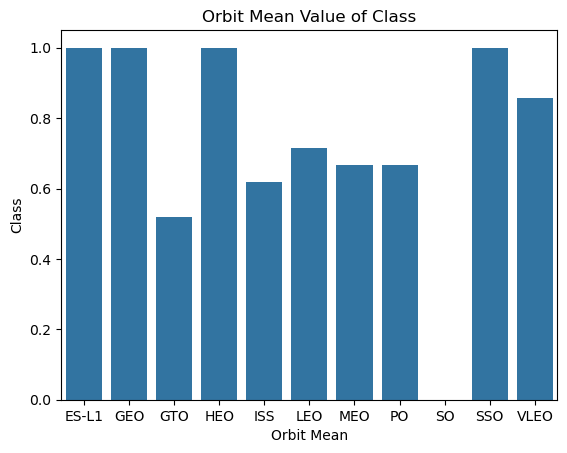

,Orbit,Class
0,ES-L1,1.000000
1,GEO,1.000000
2,GTO,0.518519
3,HEO,1.000000
4,ISS,0.619048
5,LEO,0.714286
6,MEO,0.666667
7,PO,0.666667
8,SO,0.000000
9,SSO,1.000000


In [84]:
# HINT use groupby method on Orbit column and get the mean of Class colums

df_orbit_class = df.groupby('Orbit')['Class'].mean().reset_index()

sns.barplot(x='Orbit', y='Class', data=df_orbit_class)
plt.xlabel('Orbit Mean')
plt.ylabel('Class')
plt.title('Orbit Mean Value of Class')
plt.show()

df_orbit_class

プロットされたバーチャートを分析すると、どの軌道が高い成功率を持っているかを見つけてみてください。


### タスク4：フライトナンバーと軌道タイプの関係を視覚化する


各軌道について、FlightNumber と軌道タイプの間に何らかの関係があるかどうかを確認します。


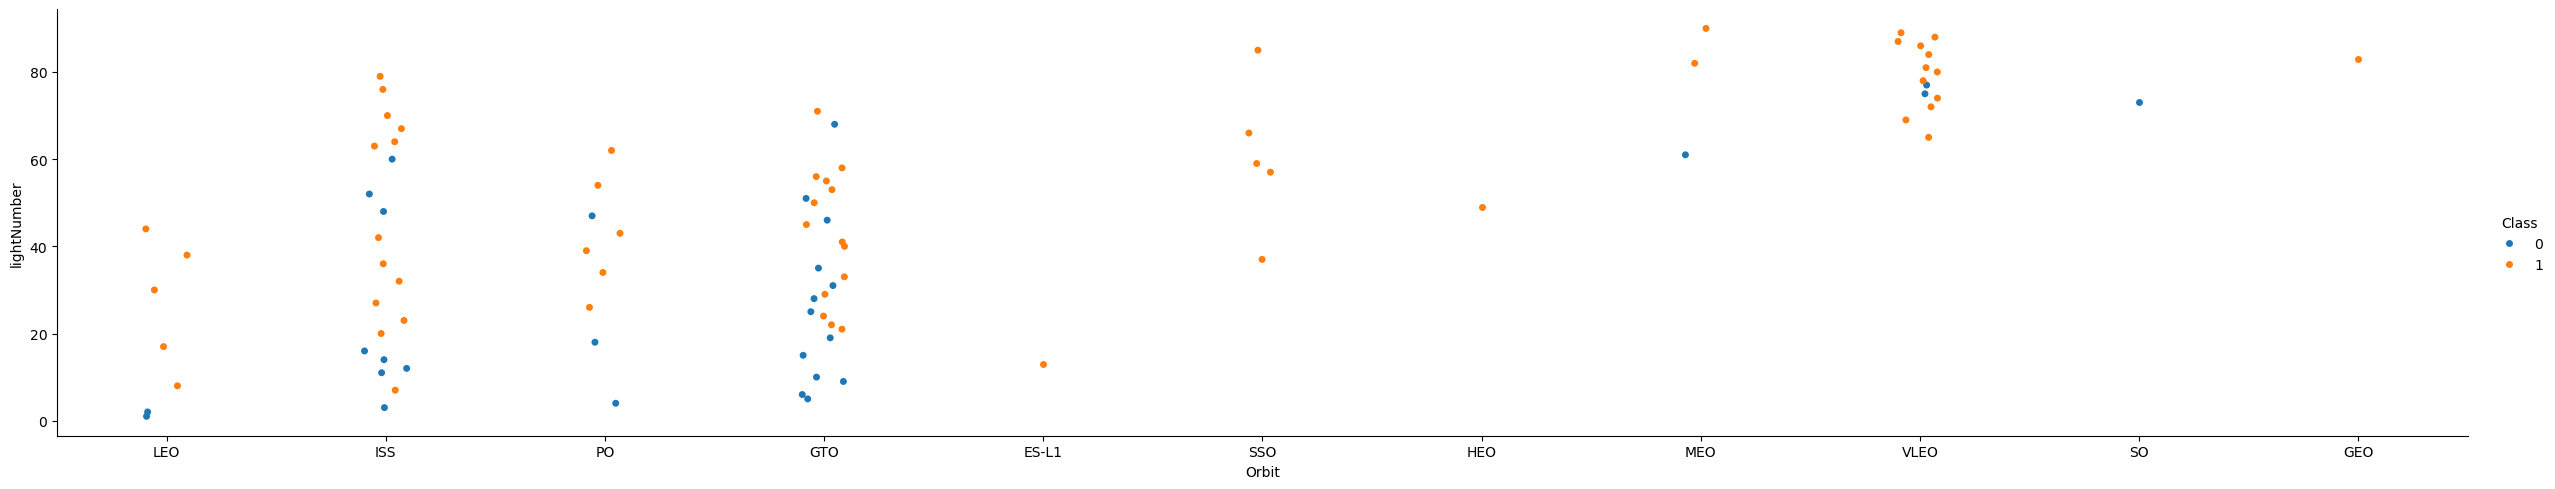

In [85]:
# x軸を備えた散布ポイントチャートを飛行ナンバーとy軸を軌道にプロットし、軌道に合わせてclass値にすること

sns.catplot(x='Orbit', y='FlightNumber', hue='Class', data=df, aspect=5)
plt.ylabel('lightNumber')
plt.xlabel('Orbit')
plt.show()


In [86]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

レオ軌道では、成功がフライト数に関連しているように見えることがわかります。一方、GTO ORBITにいるとき、フライト数の間に関係がないようです。


### タスク 5: ペイロードと軌道タイプの関係を視覚化する


同様に、ペイロードと軌道散布ポイントチャートをプロットして、ペイロードと軌道タイプの関係を明らかにすることができます


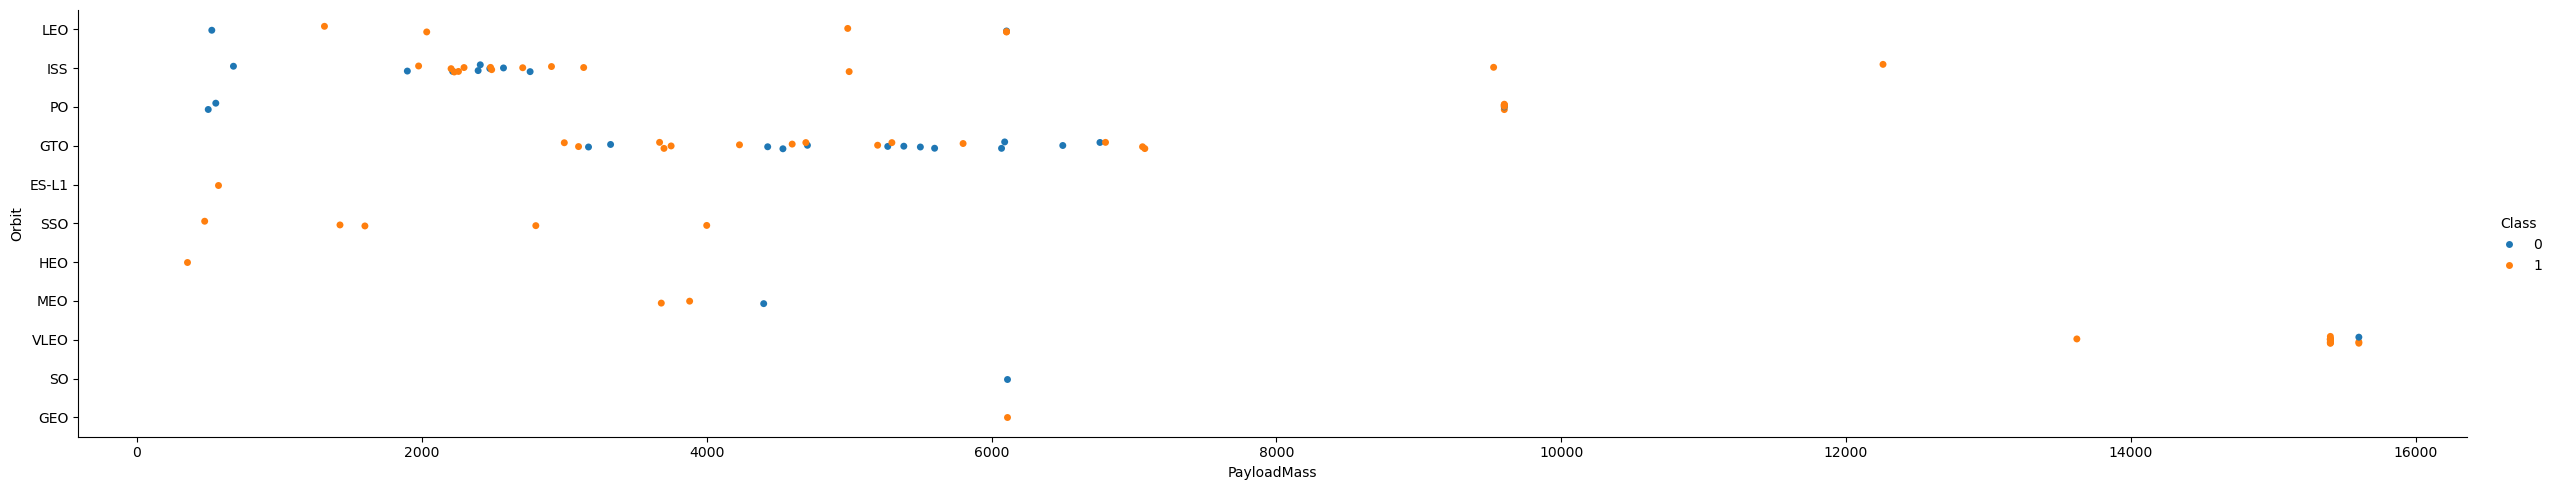

In [87]:
# x軸を持つ散布ポイントチャートをペイロードとy軸を軌道にプロットし、軌道に合わせてclass値にすることをプロットします

sns.catplot(y='Orbit', x='PayloadMass', hue='Class', data=df, aspect=5)


In [88]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

重いペイロードでは、着陸率が成功したり、ポジティブな着陸率は、極性、Leo、ISSの方が多いです。   

ただし、GTOの場合、これを適切に区別することも、ポジティブな着陸率とネガティブな着陸率（失敗したミッション）の両方がここにあります。




### タスク 6: 発売成功の年間傾向を視覚化する


x軸を持つラインチャートを<code>年に</code>およびy軸を平均成功率にプロットして、平均発射成功傾向を得ることができます。


この関数は、日付から年を取得するのに役立ちます。


In [89]:
# 日付から数年を抽出する関数
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
    
Extract_year(df.Date)

['2010',
 '2012',
 '2013',
 '2013',
 '2013',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020']

In [90]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


<Axes: ylabel='Class'>

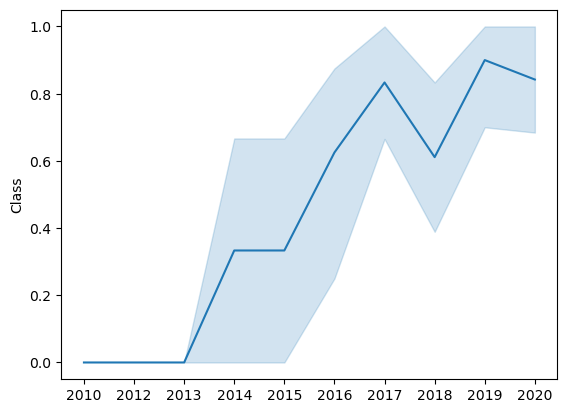

In [91]:
# 抽出された年を x 軸、成功率を y 軸として折れ線グラフをプロットします。

sns.lineplot(y='Class', x=year, data=df)


2013 年以降の成功率は 2017 年まで増加し続け (2014 年は安定)、2015 年以降は増加し始めていることがわかります。


## 機能エンジニアリング

ここまでで、各重要な変数が成功率にどのような影響を与えるかについて、予備的な洞察を得ることができました。将来のモジュールで成功予測に使用される特徴を選択します。


In [92]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


###タスク7：カテゴリ列にダミー変数を作成します

関数 <code>get_dummies</code> と <code>features</code> データフレームを使用して、OneHotEncoder を列 <code>Orbits</code>、<code>LaunchSite</code>、<code>LandingPad< に適用します。 /code> および <code>シリアル</code>。値を変数 <code>features_one_hot</code> に割り当て、メソッド ヘッドを使用して結果を表示します。結果のデータフレームには、エンコードされた機能を含むすべての機能が含まれている必要があります。

In [96]:
# HINT: Use get_dummies() function on the categorical columns

features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


###タスク8：すべての数値列を「float64」にキャストします


これで、<code> feature_one_hot </code> dataFrameには数値のみが含まれています。データフレーム全体を可変タイプ<code> float64 </code>にキャストします


In [97]:
# HINT: use astype function
features_one_hot.shape



(90, 80)

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range. 


<code>features_one_hot.to_csv('dataset_part_3.csv', index=False)</code>


## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


<a href="https://www.linkedin.com/in/nayefaboutayoun/">Nayef Abou Tayoun</a> is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2021-10-12        | 1.1     | Lakshmi Holla     | Modified markdown |
| 2020-09-20        | 1.0     | Joseph     | Modified Multiple Areas |
| 2020-11-10       | 1.1    | Nayef      | updating the input data |


Copyright © 2020 IBM Corporation. All rights reserved.
